In [15]:
import math
import numpy as np
import pandas as pd
import itertools
from Pricing.SABR import SABR_model
from Pricing.black_pricing import BSPricer_SABR
from Pricing.pdf_calculation import numerical_pdf
from Pricing.cdf_calculation import numerical_cdf
from matplotlib import pyplot as plt
from Pricing.arbitrage_check import arbitrage_check

In [70]:
F=[0.02,0.02]
vol=0.4
beta=0.9
rho=0
nu=0.5
alpha = 0.4 * math.pow(F[0],(1-beta))
expiry=np.array([5,20])
spread = np.arange(0.000,0.1,0.01)
K = [[0 for y in range(len(spread))] for x in range(len(F))]

for i in range(len(F)):
    for j in range(len(spread)):
        K[i][j]=F[i]+spread[j]        
K=np.array(K)

#### Another set of parameters

In [81]:
F=[0.02,0.02]
#vol=0.4
beta=0.5
rho=0
nu=0.3
alpha = 0.4 * math.pow(F[0],(1-beta))
expiry=np.array([5,20])
spread = np.arange(-0.0175,0.1,0.001)
K = [[0 for y in range(len(spread))] for x in range(len(F))]

for i in range(len(F)):
    for j in range(len(spread)):
        K[i][j]=F[i]+spread[j]        
K=np.array(K)
K

array([[ 0.0025,  0.0035,  0.0045,  0.0055,  0.0065,  0.0075,  0.0085,
         0.0095,  0.0105,  0.0115,  0.0125,  0.0135,  0.0145,  0.0155,
         0.0165,  0.0175,  0.0185,  0.0195,  0.0205,  0.0215,  0.0225,
         0.0235,  0.0245,  0.0255,  0.0265,  0.0275,  0.0285,  0.0295,
         0.0305,  0.0315,  0.0325,  0.0335,  0.0345,  0.0355,  0.0365,
         0.0375,  0.0385,  0.0395,  0.0405,  0.0415,  0.0425,  0.0435,
         0.0445,  0.0455,  0.0465,  0.0475,  0.0485,  0.0495,  0.0505,
         0.0515,  0.0525,  0.0535,  0.0545,  0.0555,  0.0565,  0.0575,
         0.0585,  0.0595,  0.0605,  0.0615,  0.0625,  0.0635,  0.0645,
         0.0655,  0.0665,  0.0675,  0.0685,  0.0695,  0.0705,  0.0715,
         0.0725,  0.0735,  0.0745,  0.0755,  0.0765,  0.0775,  0.0785,
         0.0795,  0.0805,  0.0815,  0.0825,  0.0835,  0.0845,  0.0855,
         0.0865,  0.0875,  0.0885,  0.0895,  0.0905,  0.0915,  0.0925,
         0.0935,  0.0945,  0.0955,  0.0965,  0.0975,  0.0985,  0.0995,
      

In [87]:
ivol = []
sabr=SABR_model(beta,rho,nu)
vols = sabr.ivol_matrix_validation(alpha,F,K,expiry,method='Hagan_ln')
print('Lognormal implied vols using Lognormal Hagan:')
vols

Lognormal implied vols using Lognormal Hagan:


,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,0.763567,0.697836,0.650304,0.613475,0.583703,0.558942,0.537928,0.519824,0.504048,0.490179,...,0.362676,0.362764,0.362853,0.362942,0.363032,0.363121,0.363210,0.363300,0.363389,0.363478
1,0.895409,0.811519,0.752130,0.706756,0.670446,0.640475,0.615188,0.593506,0.574684,0.558187,...,0.405573,0.405657,0.405740,0.405824,0.405909,0.405993,0.406078,0.406163,0.406248,0.406334


In [64]:
h=0.001
bs=BSPricer_SABR(beta,rho,nu)
price=bs.BS_matrix(alpha,F,K,expiry,1,0,'Hagan_ln')
price_plus=bs.BS_matrix(alpha,F,K+h,expiry,1,0,'Hagan_ln')
print('price:')
print(price)
print('price_plus:')
print(price_plus)

price:
[[ 0.01603954  0.00952371  0.0054425   0.00319039  0.00197062  0.00128367
   0.0008754   0.00061998  0.00045289  0.00033939  0.00025983  0.00020254]
 [ 0.01902688  0.01567879  0.01295627  0.01107078  0.00976418  0.00881698
   0.00809614  0.00752453  0.00705619  0.00666244  0.00632455  0.0060298 ]]
price_plus:
[[ 0.01528279  0.00900967  0.00514967  0.00303275  0.0018836   0.00123308
   0.00084439  0.00060003  0.00043954  0.00033015  0.00025324  0.00019773]
 [ 0.01870776  0.01536581  0.01273366  0.01091845  0.00965607  0.00873632
   0.0080332   0.00747363  0.00701383  0.00662638  0.00629331  0.00600233]]


In [65]:
(price_plus-price)/h

array([[-0.75674491, -0.51403997, -0.29282778, -0.15764627, -0.0870132 ,
        -0.05058367, -0.03101875, -0.01994393, -0.01334978, -0.0092436 ,
        -0.00658585, -0.00480754],
       [-0.31912591, -0.31298467, -0.22260287, -0.15233056, -0.10810793,
        -0.08066209, -0.06293339, -0.05090392, -0.04236177, -0.03605496,
        -0.03124393, -0.02747239]])

In [66]:
cdf=numerical_cdf(alpha,beta,rho,nu,F,K,expiry,1,0,0.001,'Hagan_ln')
cdf

array([[ 0.75674491,  0.51403997,  0.29282778,  0.15764627,  0.0870132 ,
         0.05058367,  0.03101875,  0.01994393,  0.01334978,  0.0092436 ,
         0.00658585,  0.00480754],
       [ 0.31912591,  0.31298467,  0.22260287,  0.15233056,  0.10810793,
         0.08066209,  0.06293339,  0.05090392,  0.04236177,  0.03605496,
         0.03124393,  0.02747239]])

In [67]:
arb=arbitrage_check(beta,rho,nu)
arb.arbitrage(alpha,F,K,expiry,1,0,0.001,'Hagan_ln')

SABR volatility method: Hagan_ln
Expiry= 5 Strike price= 0.005 c.d.f= -0.75674491205 p.d.f= 19.4269538036 No
Expiry= 5 Strike price= 0.015 c.d.f= -0.514039966257 p.d.f= 25.4702716554 No
Expiry= 5 Strike price= 0.025 c.d.f= -0.292827776883 p.d.f= 18.3361095561 No
Expiry= 5 Strike price= 0.035 c.d.f= -0.15764626729 p.d.f= 10.0203944581 No
Expiry= 5 Strike price= 0.045 c.d.f= -0.0870131987402 p.d.f= 5.12721737862 No
Expiry= 5 Strike price= 0.055 c.d.f= -0.0505836726542 p.d.f= 2.68779612187 No
Expiry= 5 Strike price= 0.065 c.d.f= -0.0310187484477 p.d.f= 1.48141864008 No
Expiry= 5 Strike price= 0.075 c.d.f= -0.0199439341238 p.d.f= 0.860508277242 No
Expiry= 5 Strike price= 0.085 c.d.f= -0.0133497804359 p.d.f= 0.524295167737 No
Expiry= 5 Strike price= 0.095 c.d.f= -0.00924359601355 p.d.f= 0.333014237649 No
Expiry= 5 Strike price= 0.105 c.d.f= -0.0065858476141 p.d.f= 0.219222522115 No
Expiry= 5 Strike price= 0.115 c.d.f= -0.00480754419846 p.d.f= 0.148818724129 No
Expiry= 20 Strike price= 0.005

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]])

In [82]:
pdf=numerical_pdf(alpha,beta,rho,nu,F,K,expiry,1,0,0.001,'Hagan_ln')
cdf=numerical_cdf(alpha,beta,rho,nu,F,K,expiry,1,0,0.001,'Hagan_ln')

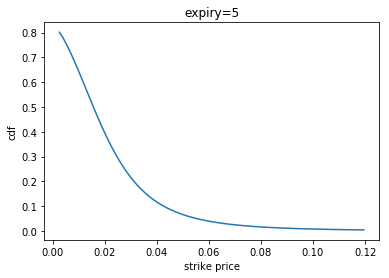

In [83]:
plt.plot(K[0],cdf[0])
plt.xlabel('strike price')
plt.ylabel('cdf')
plt.title('expiry=5')
#plt.yticks(np.arange(min(cdf[0]), max(cdf[0])+1, 0.2))
plt.show()

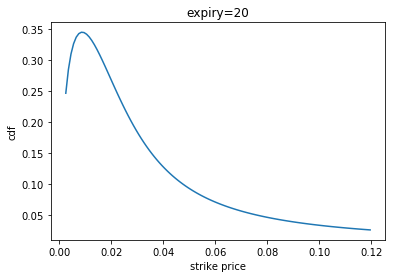

In [84]:
plt.plot(K[1],cdf[1])
plt.xlabel('strike price')
plt.ylabel('cdf')
plt.title('expiry=20')Z
#plt.yticks(np.arange(min(cdf[1]), max(cdf[1])+1, 0.2))
plt.show()

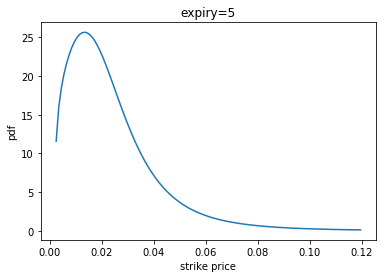

In [85]:
plt.plot(K[0],pdf[0])
plt.xlabel('strike price')
plt.ylabel('pdf')
plt.title('expiry=5')
#plt.yticks(np.arange(min(pdf[0]), max(pdf[0])+1, 0.2))
plt.show()

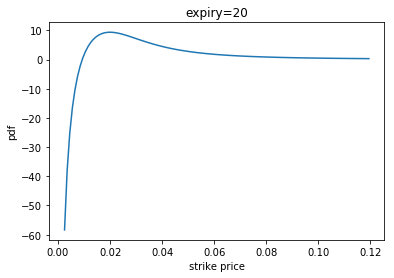

In [86]:
plt.plot(K[1],pdf[1])
plt.xlabel('strike price')
plt.ylabel('pdf')
plt.title('expiry=20')
#plt.yticks(np.arange(min(cdf[1]), max(cdf[1])+1, 0.2))
plt.show()